In [713]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"]+=os.pathsep+r'C:\Program Files\Graphviz\bin'
import graphviz as gr

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

# 1. Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates. How does your estimate of the treatment effect parameter compare in the following two cases 

    a. You do not control for any covariates

    b. You control for all the covariates that affect the outcome

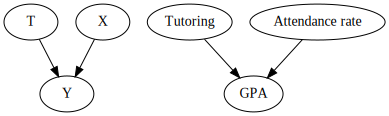

In [714]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("X", "Y")

g.edge("Tutoring", "GPA")
g.edge("Attendance rate", "GPA")
g

## Suppose that an effect of Tutoring to GPA in a highschool will be analyzed. We also know that Attendance rate affects GPA, too. To estimate the size of treatment effect (Tutoring), the other covariate, Attendance rate, need to be controlled. 

## Acutal relations among GPA, Treatment (tutoring) and Attendance rate  
## Y= $\alpha$ + $\beta$ * T +$\gamma$*X + $\epsilon$

## T is treatment effect (Tutoring) and X is a covariate (Attendance rate). The covariate in the case (B) is under control. : Y= $\alpha$ + $\beta$ * T +$\gamma$*X + $\epsilon$


## Otherwise, the case (A) doesn't control the covariate.: Y= $\alpha$ + $\beta$ * T + $\epsilon$

### I will estimate case (B) first. And then same process of case (A) will be done.

## 1-b. control covariates

### n = 100

In [715]:
a = .5
b = 1.2
c = 2.1
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(100):
    T = np.random.randint(2,size=n)
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,.5,n)
    Y = a+b*T+c*X+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e = e))
    mod = smf.ols("Y~T+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]

df['fitted'] = res.fittedvalues

bias = $\hat\theta -\theta$, 
RMSE, 
size of treatment effect

In [716]:
bias = np.mean(slope_estimates - b*np.ones(shape=(n,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={n}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = -0.0010855373003882673, RMSE=0.0010855373003882673, treatment_effect =1.1989144626996115


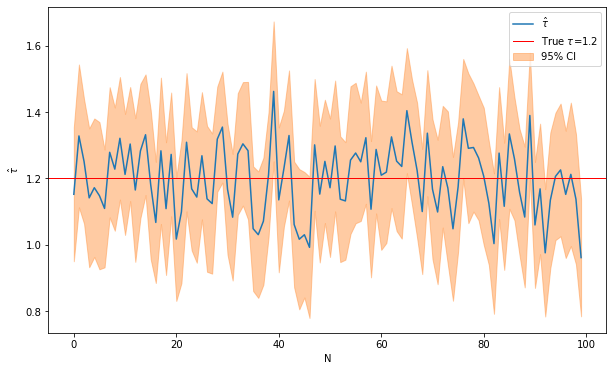

In [717]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(100),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(100), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

### n = 1000

In [718]:
a = .5
b = 1.2
c = 2.1
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(1000):
    T = np.random.randint(2,size=n)
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,.5,n)
    Y = a+b*T+c*X+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e = e))
    mod = smf.ols("Y~T+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

bias = $\hat\theta -\theta$, 
RMSE, 
size of treatment effect

In [719]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = 0.006095808529336799, RMSE=0.006095808529336799, treatment_effect =1.206095808529337


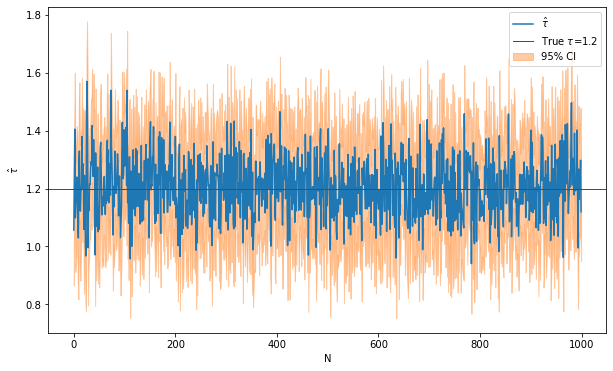

In [720]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(1000),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(1000), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

## : As sample size of Monte Carlo Experience goes up, the coefficents of Treatment and Covariate are more closer to real value.

## 1-a. do not control covariates
### In this case, I will regress Y on only T.
### n = 100

In [721]:
a = .5
b = 1.2
c = 2.1
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(100):
    T = np.random.randint(2,size=n)
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,.5,n)
    Y = a+b*T+c*X+e
    df = pd.DataFrame(dict(Y = Y, T = T, X= X, e = e))
    mod = smf.ols("Y~T",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]

df['fitted'] = res.fittedvalues

bias = $\hat\theta -\theta$, 
RMSE, 
size of treatment effect

In [722]:
bias = np.mean(slope_estimates - b*np.ones(shape=(100,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={100}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = 0.015137548335272972, RMSE=0.015137548335272972, treatment_effect =1.2151375483352729


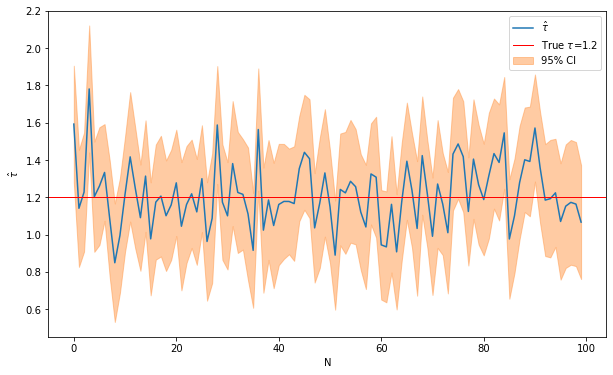

In [723]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(100),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(100), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

### n = 1000

In [724]:
a = .5
b = 1.2
c = 2.1
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []


for mc_replication in range(1000):
    X = np.random.randint(2,size=n)
    Z = np.random.uniform(0,1,n)
    e = np.random.normal(0,.5,n)
    Y = a+b*T+c*X+e
    df = pd.DataFrame(dict(Y = Y, T = T, X= X, e = e))
    mod = smf.ols("Y~T",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]

df['fitted'] = res.fittedvalues

bias = $\hat\theta -\theta$, 
RMSE, 
size of treatment effect

In [725]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = -0.008692119019892725, RMSE=0.008692119019892725, treatment_effect =1.1913078809801072


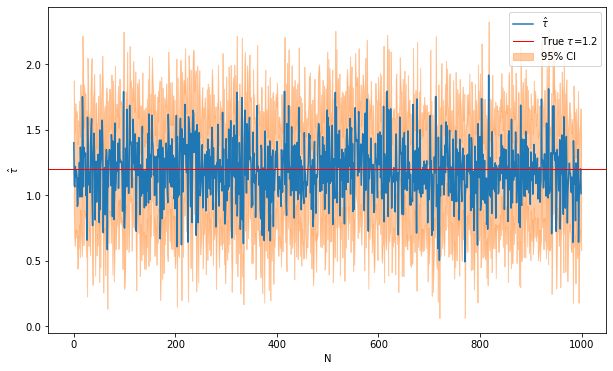

In [726]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(1000),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(1000), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

## : A regression without controling the covariate (X) has bigger bias and RMSE than the regression with controlling the covariate.

# 2. Simulate a DGP with a confounder (common cause)

    a. You fail to control for the confounder
    
    b. You do control for the confounder

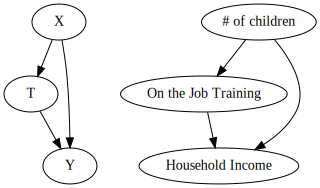

In [727]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("# of children", "On the Job Training"),
g.edge("# of children", "Household Income"),
g.edge("On the Job Training", "Household Income")

g

# We want to predict the impact of 'On the Job Training (OJT)' to household income. The number of children also affects participation of OJT and household income. Therefore, # of Children is confounder.

## Acutal relations among Household Income, Treatment (OJT) and # of Children is as below 
## Y= $\alpha$ + $\beta$ * T +$\gamma$*X + $\epsilon$

## T is treatment effect (OJT) and X is a confounder (# of children). The confounder in the case (B) is under control. : Y= $\alpha$ + $\beta$ * T +$\gamma$*X + $\epsilon$


## Otherwise, the case (A) doesn't control the confounder.: Y= $\alpha$ + $\beta$ * T + $\epsilon$

### I will estimate case (B) first. And then same process of case (A) will be done.

# 2-b. Control for the confounder

### n = 100

In [728]:
a = 50
b = 3.0
c = -2.5

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(100):
    X= list(np.repeat(0,40))+ list(np.repeat(1,20))+list(np.repeat(2,24)) +list(np.repeat(3,12))+list(np.repeat(4,4))
    T= list(random.choices([0,1],[0.2, 0.8],k=40)) + list(random.choices([0,1],[0.4, 0.6],k=20)) + list(random.choices([0,1],[0.6, 0.4],k=24)) + list(random.choices([0,1],[0.7, 0.3],k=12))+ list(random.choices([0,1],[0.8, 0.2],k=4))
    e = np.random.normal(10,10,100)
    Y= np.repeat(a,100) + np.repeat(b,100)*T + np.repeat(c,100)*X + e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e=e))
    mod = smf.ols("Y~T+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [729]:
from statsmodels.formula.api import logit

logit('T~X', data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.556891
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      T   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.1614
Time:                        00:21:00   Log-Likelihood:                -55.689
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 3.661e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6170      0.365      4.426      0.000       0.901       2.333
X             -0.8696      0.209     -4.157      0.000      -1.280      -0.460
==============================================================================
"""

## As shown in the table, employees tend to participate in OJT (T) less if they have children (X).

In [730]:
bias = np.mean(slope_estimates - b*np.ones(shape=(100,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={100}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = 0.12365899756617006, RMSE=0.12365899756617006, treatment_effect =3.12365899756617


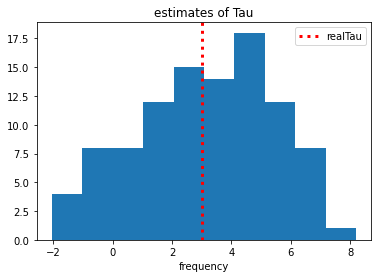

In [731]:
plt.hist(slope_estimates)

plt.axvline(b, color ='red', linestyle ='dotted', linewidth=3, label='realTau')
plt.legend()

plt.title("estimates of Tau")
plt.xlabel("frequency")

plt.show()

### n = 1000

In [732]:
a = 50
b = 3.0
c = -2.5

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(1000):
    X= list(np.repeat(0,40))+ list(np.repeat(1,20))+list(np.repeat(2,24)) +list(np.repeat(3,12))+list(np.repeat(4,4))
    T= list(random.choices([0,1],[0.2, 0.8],k=40)) + list(random.choices([0,1],[0.4, 0.6],k=20)) + list(random.choices([0,1],[0.6, 0.4],k=24)) + list(random.choices([0,1],[0.7, 0.3],k=12))+ list(random.choices([0,1],[0.8, 0.2],k=4))
    e = np.random.normal(10,10,100)
    Y= np.repeat(a,100) + np.repeat(b,100)*T + np.repeat(c,100)*X + e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e=e))
    mod = smf.ols("Y~T+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [733]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = -0.00664146803619758, RMSE=0.00664146803619758, treatment_effect =2.9933585319638025


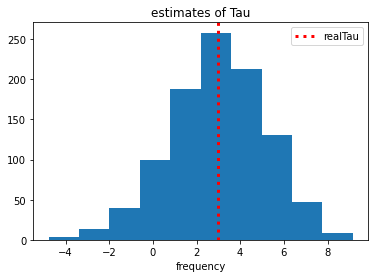

In [734]:
plt.hist(slope_estimates)

plt.axvline(b, color ='red', linestyle ='dotted', linewidth=3, label='realTau')
plt.legend()

plt.title("estimates of Tau")
plt.xlabel("frequency")

plt.show()

## : As sample size of Monte Carlo Experience goes up, the coefficents of Treatment is more closer to real value.

# 2-a. Fail to control for the confounder

### n = 100

In [735]:
a = 30
b = 3.0
c = -2.5

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(100):
    X= list(np.repeat(0,40))+ list(np.repeat(1,20))+list(np.repeat(2,24)) +list(np.repeat(3,12))+list(np.repeat(4,4))
    T= list(random.choices([0,1],[0.2, 0.8],k=40)) + list(random.choices([0,1],[0.4, 0.6],k=20)) + list(random.choices([0,1],[0.6, 0.4],k=24)) + list(random.choices([0,1],[0.7, 0.3],k=12))+ list(random.choices([0,1],[0.8, 0.2],k=4))
    e = np.random.normal(10,10,100)
    Y= np.repeat(a,100) + np.repeat(b,100)*T + np.repeat(c,100)*X + e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e=e))
    mod = smf.ols("Y~T",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [736]:
bias = np.mean(slope_estimates - b*np.ones(shape=(100,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={100}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = 2.357652852456874, RMSE=2.357652852456874, treatment_effect =5.357652852456873


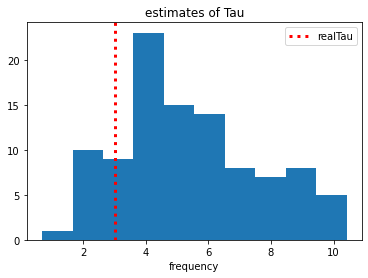

In [737]:
plt.hist(slope_estimates)

plt.axvline(b, color ='red', linestyle ='dotted', linewidth=3, label='realTau')
plt.legend()

plt.title("estimates of Tau")
plt.xlabel("frequency")

plt.show()

### n = 1000

In [738]:
a = 50
b = 3.0
c = -2.5

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(1000):
    X= list(np.repeat(0,40))+ list(np.repeat(1,20))+list(np.repeat(2,24)) +list(np.repeat(3,12))+list(np.repeat(4,4))
    T= list(random.choices([0,1],[0.2, 0.8],k=40)) + list(random.choices([0,1],[0.4, 0.6],k=20)) + list(random.choices([0,1],[0.6, 0.4],k=24)) + list(random.choices([0,1],[0.7, 0.3],k=12))+ list(random.choices([0,1],[0.8, 0.2],k=4))
    e = np.random.normal(10,10,100)
    Y= np.repeat(a,100) + np.repeat(b,100)*T + np.repeat(c,100)*X + e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, e=e))
    mod = smf.ols("Y~T",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [739]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = 2.517812654561959, RMSE=2.517812654561959, treatment_effect =5.517812654561958


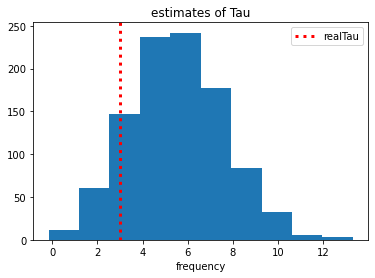

In [740]:
plt.hist(slope_estimates)

plt.axvline(b, color ='red', linestyle ='dotted', linewidth=3, label='realTau')
plt.legend()

plt.title("estimates of Tau")
plt.xlabel("frequency")

plt.show()

## If a confounder is not controlled, both bias and RSME increase.

## As the confounder is negatively related to Depedent variable and Treatment variable, omitted variable bias comes out. Because of the omitted variable bias (positive bias), the treatment effect is overestimated regardless of sample size.

# 3. Simulate a DGP with selection bias into the treatment (variable in between the path from the treatment to the outcome)

    a. You control for the variable in between the path from cause to effect
    
    b. You do not control for the variable in between the path from cause to effect

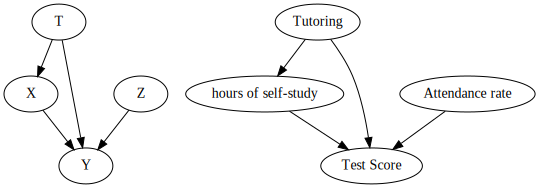

In [741]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.edge("Z", "Y")

g.edge("Tutoring", "hours of self-study")
g.edge("Tutoring", "Test Score"),
g.edge("hours of self-study", "Test Score")
g.edge("Attendance rate", "Test Score")
g

## We want to know an effect of 'Tutoring' to 'Test Score' in a highschool, again. (This is similar to Problem-1.) In this case, 'hours of self-study' is the common effect. That is, this variable, 'hours of self-study', is in between the path from the treatment (Tutoring) to the outcome (Test Score). Students tend to study more by themselves when they get Tutoring.

## From the problem-1, we knew that 'Attendance rate' affects 'Test Score'. 'Attendance rate' is controlled in both (A) and (B).

### 3-(a) : 'hours of self-study' will be controlled. / 3-(b) : 'hours of self-study' will not be controlled.

# 3-a.  control for the variable in between the path from cause to effect

### n = 100

In [742]:
a = .5
b = 1.2
c = 2.1
d= 0.8
h = 11
i = 10
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []


for mc_replication in range(100):
    T = list(random.choices([0,1],[0.4, 0.6],k=n))
    u = np.random.normal(7,7,n)
    X = h+np.repeat(i, n)*T+u
    Z = np.random.uniform(0,1,n)
    e = np.random.normal(5,3,n)
    Y = a+np.repeat(b,n)*T+d*Z+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, Z=Z, u=u, e = e))
    mod = smf.ols("Y~T+Z+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [743]:
bias = np.mean(slope_estimates - b*np.ones(shape=(100,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={100}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = 0.030407846697316634, RMSE=0.030407846697316634, treatment_effect =1.2304078466973165


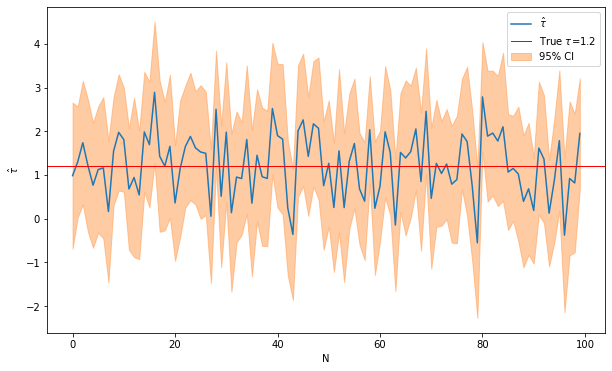

In [744]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(100),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(100), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

### n = 1000

In [745]:
a = .5
b = 1.2
c = 2.1
d= 0.8
h = 11
i = 10
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []


for mc_replication in range(1000):
    T = list(random.choices([0,1],[0.4, 0.6],k=n))
    u = np.random.normal(7,7,n)
    X = h+np.repeat(i, n)*T+u
    Z = np.random.uniform(0,1,n)
    e = np.random.normal(5,3,n)
    Y = a+np.repeat(b,n)*T+d*Z+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, Z=Z, u=u, e = e))
    mod = smf.ols("Y~T+Z+X",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [746]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = -0.005762469678603967, RMSE=0.005762469678603967, treatment_effect =1.1942375303213961


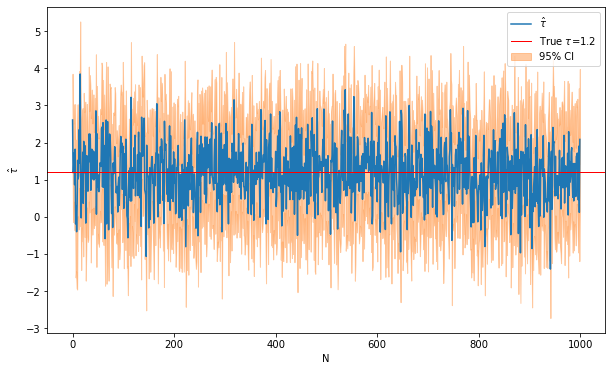

In [747]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(1000),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(1000), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

# : As the variable in between the path from cause to effect is controlled, bias is still big regardless of MC repeatition.

# 3-b. Do not control for the variable in between the path from cause to effect

### n = 100

In [748]:
a = .5
b = 1.2
c = 2.1
d= 0.8
h = 11
i = 10
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(100):
    T = list(random.choices([0,1],[0.4, 0.6],k=n))
    u = np.random.normal(7,7,n)
    X = h+np.repeat(i, n)*T+u
    Z = np.random.uniform(0,1,n)
    e = np.random.normal(5,3,n)
    Y = a+np.repeat(b,n)*T+d*Z+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, Z=Z, u=u, e = e))
    mod = smf.ols("Y~T+Z",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
df['fitted'] = res.fittedvalues

In [749]:
bias = np.mean(slope_estimates - b*np.ones(shape=(100,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={100}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=100: bias = 0.0022759828125879134, RMSE=0.0022759828125879134, treatment_effect =1.202275982812588


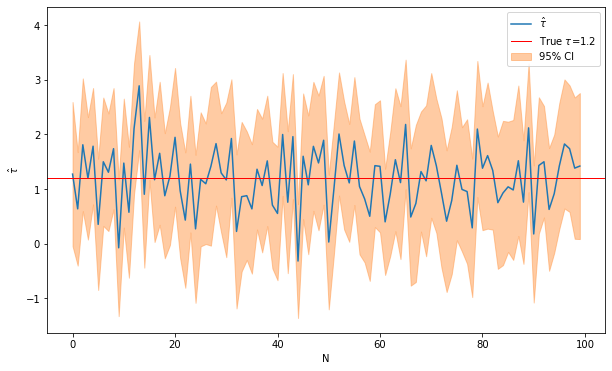

In [750]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(100),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(100), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

### n = 1000

In [751]:
a = .5
b = 1.2
c = 2.1
d= 0.8
h = 11
i = 10
n = 100

slope_estimates = []
sehats = []
lb = []
ub = []

for mc_replication in range(1000):
    T = list(random.choices([0,1],[0.4, 0.6],k=n))
    u = np.random.normal(7,7,n)
    X = h+np.repeat(i, n)*T+u
    Z = np.random.uniform(0,1,n)
    e = np.random.normal(5,3,n)
    Y = a+np.repeat(b,n)*T+d*Z+e
    df = pd.DataFrame(dict(Y = Y, T = T, X = X, Z=Z, u=u, e = e))
    mod = smf.ols("Y~T+Z",data=df)
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    sehats = sehats + [res.HC1_se[1]]
    lb = lb + [res.params[1]-1.96*res.HC1_se[1]]
    ub = ub + [res.params[1]+1.96*res.HC1_se[1]]
    
    
df['fitted'] = res.fittedvalues

In [752]:
bias = np.mean(slope_estimates - b*np.ones(shape=(1000,), dtype=np.int8))
rmse = np.sqrt(np.mean(bias**2))
treatment_effect = np.mean(slope_estimates)

print(f'N={1000}: bias = {bias}, RMSE={rmse}, treatment_effect ={treatment_effect}')

N=1000: bias = 0.015480035038232387, RMSE=0.015480035038232387, treatment_effect =1.2154800350382324


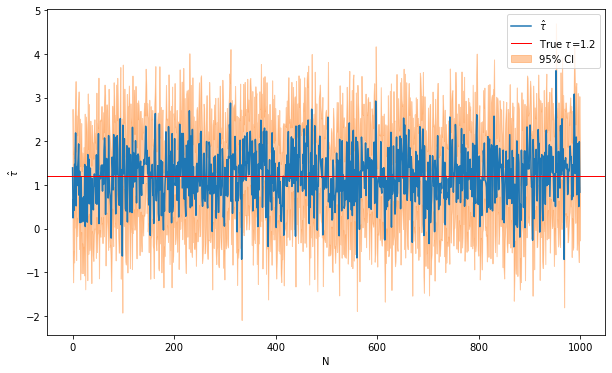

In [753]:
fig = plt.figure(figsize = (10,6))
plt.plot(range(1000),slope_estimates,label = '$\hat{\\tau}$')
plt.xlabel('N')
plt.ylabel('$\hat{\\tau}$')
plt.axhline(y=b, color='r', linestyle='-',linewidth=1,label='True $\\tau$={}'.format(b))
plt.fill_between(range(1000), lb, ub, alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
plt.legend()

# When the variable between the path from cause to effect are excluded, bias and RMSE are much smaller. 

# : Do not include variables in between the path from cause to effect. 